In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DataAnalysis_jobmarket_UAE.csv")

In [3]:
df

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required
0,Data Analyst,Etisalat,Abu Dhabi,3,10000,15000,"SQL, Python, Tableau, Data analysis, report..."
1,Senior Data Analyst,Emirates Airlines,Dubai,5,18000,25000,"Advanced SQL, R, Power BI, Predictive modeli..."
2,Business Data Analyst,Noon.com,Dubai,2,8000,12000,"Excel, SQL, Google Analytics, E-commerce dat..."
3,Financial Data Analyst,First Abu Dhabi Bank (FAB),Abu Dhabi,4,15000,22000,"Financial modeling, SQL, SAS, Risk analysis,..."
4,Marketing Data Analyst,Careem,Dubai,2,9000,14000,"Marketing analytics, SQL, CRM tools, Campaig..."
...,...,...,...,...,...,...,...
912,Data Analyst,Ajman Free Zone,Ajman,3,11000,16000,"Museum visitor data, Python, Power BI, , ,"
913,Data Analyst,Al Ain Municipality Parks Department,Al Ain,3,12000,17000,"Museum visitor data, Python, Power BI, , ,"
914,Junior Data Analyst,Sharjah Commerce and Tourism Development Autho...,Sharjah,1,7500,10500,"Museum visitor data, Python, Power BI, , ,"
915,Data Analyst,Fujairah Municipality,Fujairah,3,12500,17500,"Museum visitor data, Python, Power BI, , ,"


In [4]:
df.head

<bound method NDFrame.head of                            Title  \
0                   Data Analyst   
1            Senior Data Analyst   
2          Business Data Analyst   
3         Financial Data Analyst   
4         Marketing Data Analyst   
..                           ...   
912                 Data Analyst   
913                 Data Analyst   
914          Junior Data Analyst   
915                 Data Analyst   
916          Senior Data Analyst   

                                               Company   Location  \
0                                             Etisalat  Abu Dhabi   
1                                    Emirates Airlines      Dubai   
2                                             Noon.com      Dubai   
3                           First Abu Dhabi Bank (FAB)  Abu Dhabi   
4                                               Careem      Dubai   
..                                                 ...        ...   
912                                    Ajman Free Zone

In [5]:
df.shape

(917, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            917 non-null    object
 1   Company          917 non-null    object
 2   Location         917 non-null    object
 3   MIN_Experience   917 non-null    int64 
 4   MIN_Salary       917 non-null    int64 
 5   MAX_Salary       917 non-null    int64 
 6   Skills Required  917 non-null    object
dtypes: int64(3), object(4)
memory usage: 50.3+ KB


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(subset=["Title","Company","Location","Skills Required"], inplace=True)

In [9]:
df["MIN_Experience"] = pd.to_numeric(df["MIN_Experience"], errors = 'coerce')
df["MIN_Salary"] = pd.to_numeric(df["MIN_Salary"], errors = 'coerce')
df["MAX_Salary"] = pd.to_numeric(df["MAX_Salary"], errors = 'coerce')

In [10]:
df["AVG_Salary"] = (df["MIN_Salary"] + df["MAX_Salary"])/2

In [11]:
df.head(2)

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required,AVG_Salary
0,Data Analyst,Etisalat,Abu Dhabi,3,10000,15000,"SQL, Python, Tableau, Data analysis, report...",12500.0
1,Senior Data Analyst,Emirates Airlines,Dubai,5,18000,25000,"Advanced SQL, R, Power BI, Predictive modeli...",21500.0


In [12]:
df["Skills Required"] = df["Skills Required"].astype(str).str.lower()
df["Skills Required"] = df["Skills Required"].str.replace("and",",", regex = False)
df["Skills Required"] = df["Skills Required"].str.replace(r"[^a-zA-z0-9, ]","", regex = True)

In [13]:
df["Skill_List"] = df["Skills Required"].str.split(",")
df["Skill_List"] = df["Skill_List"].apply(lambda x: [s.strip() for s in x if s.strip() != ""])


In [14]:
df

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,Skills Required,AVG_Salary,Skill_List
0,Data Analyst,Etisalat,Abu Dhabi,3,10000,15000,"sql, python, tableau, data analysis, report...",12500.0,"[sql, python, tableau, data analysis, reportin..."
1,Senior Data Analyst,Emirates Airlines,Dubai,5,18000,25000,"advanced sql, r, power bi, predictive modeli...",21500.0,"[advanced sql, r, power bi, predictive modelin..."
2,Business Data Analyst,Noon.com,Dubai,2,8000,12000,"excel, sql, google analytics, ecommerce data...",10000.0,"[excel, sql, google analytics, ecommerce data ..."
3,Financial Data Analyst,First Abu Dhabi Bank (FAB),Abu Dhabi,4,15000,22000,"financial modeling, sql, sas, risk analysis,...",18500.0,"[financial modeling, sql, sas, risk analysis, ..."
4,Marketing Data Analyst,Careem,Dubai,2,9000,14000,"marketing analytics, sql, crm tools, campaig...",11500.0,"[marketing analytics, sql, crm tools, campaign..."
...,...,...,...,...,...,...,...,...,...
722,Data Analyst,Fujairah Aviation Academy,Fujairah,3,12500,17500,"museum visitor data, python, power bi, , ,",15000.0,"[museum visitor data, python, power bi]"
723,Senior Data Analyst,Sharjah Airport Authority,Sharjah,5,19000,28000,"museum visitor data, python, power bi, , ,",23500.0,"[museum visitor data, python, power bi]"
724,Business Data Analyst,Dubai Safari Park Management,Dubai,2,9500,14500,"museum visitor data, python, power bi, , ,",12000.0,"[museum visitor data, python, power bi]"
725,Data Analyst,Ajman Sewerage,Ajman,3,11000,16000,"museum visitor data, python, power bi, , ,",13500.0,"[museum visitor data, python, power bi]"


Title
Data Analyst                     50
        Data Analyst             37
Business Data Analyst            21
Junior Data Analyst              16
Senior Data Analyst              15
        Business Data Analyst    13
        Senior Data Analyst      11
        Junior Data Analyst      10
Marketing Data Analyst            2
Financial Data Analyst            2
Name: count, dtype: int64


<Axes: title={'center': 'top 10 Job in UAE'}, xlabel='Title'>

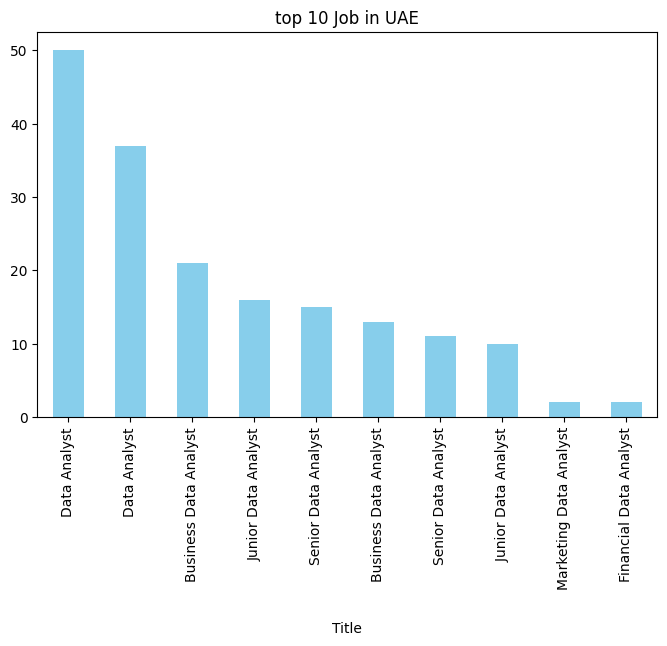

In [15]:
top_titles= df["Title"].value_counts().head(10)
print(top_titles)

top_titles.plot(kind="bar",title="top 10 Job in UAE",figsize=(8,5),color="skyblue")

Location
Dubai             51
Sharjah           42
Fujairah          25
Al Ain            24
Ras Al Khaimah    15
Abu Dhabi         11
Ajman              9
Name: count, dtype: int64


<Axes: title={'center': 'Top Hiring Locations in UAE'}, ylabel='Location'>

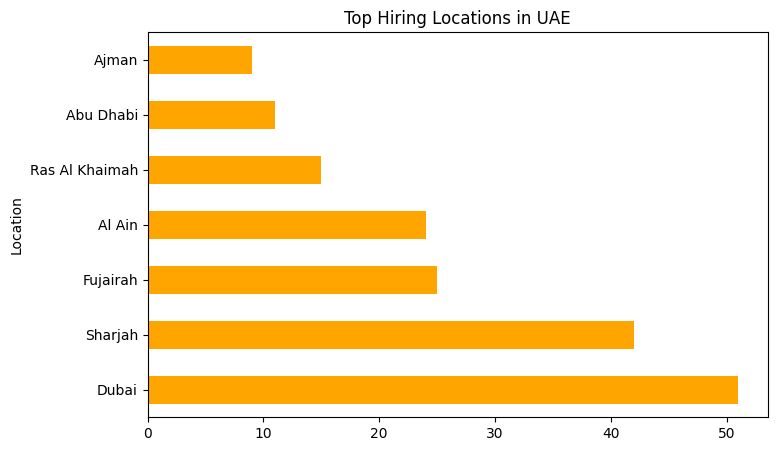

In [16]:
top_cities = df["Location"].value_counts().head(10)
print(top_cities)

top_cities.plot(kind="barh",title= "Top Hiring Locations in UAE", figsize=(8,5), color="orange")

In [17]:
from collections import Counter

all_skills = [skill for sublist in df["Skill_List"].dropna() for skill in sublist]
skill_counts = Counter(all_skills)

top_skills = skill_counts.most_common(20)

import pandas as pd
skills_df = pd.DataFrame(top_skills, columns=["Skill", "Count"])


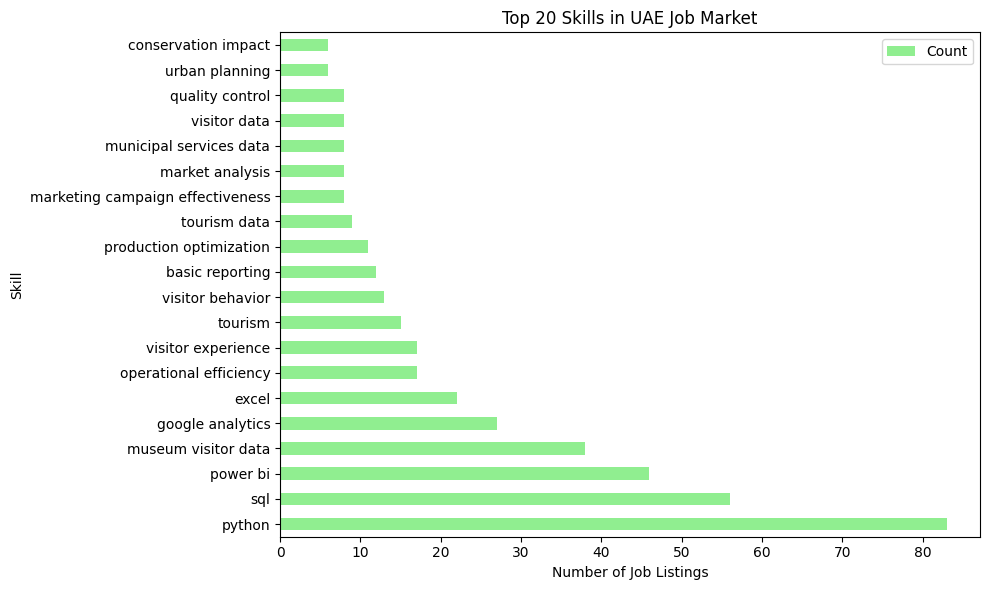

In [18]:
import matplotlib.pyplot as plt

skills_df.set_index("Skill").plot(kind="barh", figsize=(10, 6), color="lightgreen", title="Top 20 Skills in UAE Job Market")
plt.xlabel("Number of Job Listings")
plt.tight_layout()
plt.show()


Title
        Senior Data Analyst      24045.454545
Senior Data Analyst              23866.666667
Financial Data Analyst           18000.000000
        Data Analyst             14337.837838
Data Analyst                     14125.000000
        Business Data Analyst    12192.307692
Marketing Data Analyst           12000.000000
Business Data Analyst            11952.380952
        Junior Data Analyst       8800.000000
Junior Data Analyst               8718.750000
Name: AVG_Salary, dtype: float64


<Axes: title={'center': 'Highest Paying Job Titles'}, ylabel='Title'>

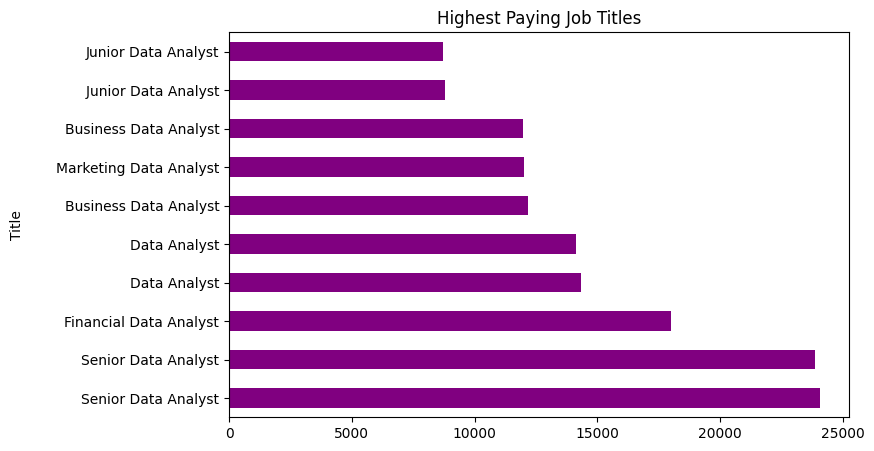

In [19]:
salary_by_title = df.groupby("Title")["AVG_Salary"].mean().sort_values(ascending=False).head(10)
print(salary_by_title)
salary_by_title.plot(kind="barh", title="Highest Paying Job Titles", color="purple", figsize=(8, 5))


Freshers Role Count: Title
Junior Data Analyst            16
        Junior Data Analyst    10
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Entry Level Jobs'}, ylabel='Title'>

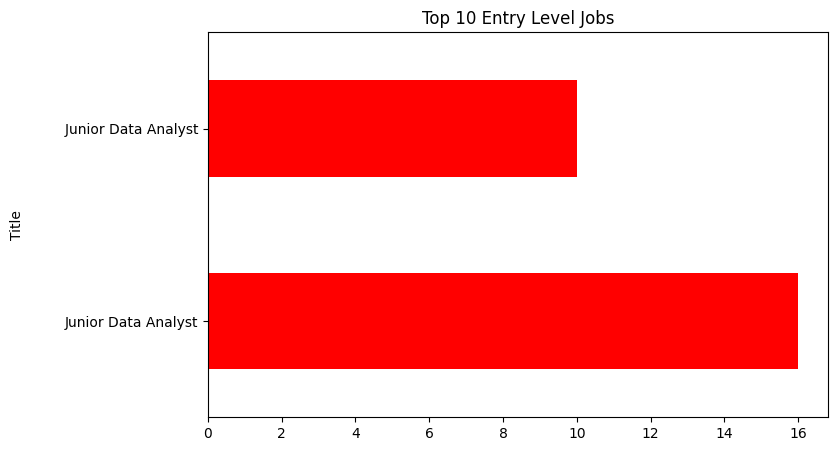

In [20]:
freshers = df[df["MIN_Experience"] <=1]
print("Freshers Role Count:",freshers["Title"].value_counts())

freshers["Title"].value_counts().head(10).plot(kind="barh",title= "Top 10 Entry Level Jobs",figsize=(8,5),color="red")

In [21]:
# Define threshold (can adjust based on boxplot)
outliers = df[df["AVG_Salary"] > 100000]  # 100k AED/month = super rare

print("Outliers:\n", outliers[["Title", "Company", "AVG_Salary"]])


Outliers:
 Empty DataFrame
Columns: [Title, Company, AVG_Salary]
Index: []


In [22]:
df.drop(columns=["Skills Required"], inplace= True)

In [23]:
df

,Title,Company,Location,MIN_Experience,MIN_Salary,MAX_Salary,AVG_Salary,Skill_List
0,Data Analyst,Etisalat,Abu Dhabi,3,10000,15000,12500.0,"[sql, python, tableau, data analysis, reportin..."
1,Senior Data Analyst,Emirates Airlines,Dubai,5,18000,25000,21500.0,"[advanced sql, r, power bi, predictive modelin..."
2,Business Data Analyst,Noon.com,Dubai,2,8000,12000,10000.0,"[excel, sql, google analytics, ecommerce data ..."
3,Financial Data Analyst,First Abu Dhabi Bank (FAB),Abu Dhabi,4,15000,22000,18500.0,"[financial modeling, sql, sas, risk analysis, ..."
4,Marketing Data Analyst,Careem,Dubai,2,9000,14000,11500.0,"[marketing analytics, sql, crm tools, campaign..."
...,...,...,...,...,...,...,...,...
722,Data Analyst,Fujairah Aviation Academy,Fujairah,3,12500,17500,15000.0,"[museum visitor data, python, power bi]"
723,Senior Data Analyst,Sharjah Airport Authority,Sharjah,5,19000,28000,23500.0,"[museum visitor data, python, power bi]"
724,Business Data Analyst,Dubai Safari Park Management,Dubai,2,9500,14500,12000.0,"[museum visitor data, python, power bi]"
725,Data Analyst,Ajman Sewerage,Ajman,3,11000,16000,13500.0,"[museum visitor data, python, power bi]"


In [24]:
def generate_job_market_insights(df, top_n_skills=10):
    print("\n📌 Total Job Listings:", len(df))
    print("📍 Locations Covered:", df['Location'].nunique())
    print("🏢 Companies Hiring:", df['Company'].nunique())

    print("\n🔹 Top Job Titles:")
    print(df['Title'].str.strip().value_counts().head(5))

    print("\n🔹 Most Hiring Locations:")
    print(df['Location'].value_counts().head(5))

    print("\n💰 Top 5 Highest Paying Job Titles (by average salary):")
    top_salary = df.groupby("Title")["AVG_Salary"].mean().sort_values(ascending=False).head(5)
    print(top_salary)

    print("\n👶 Jobs Requiring 0-1 Year Experience:")
    entry_roles = df[df["MIN_Experience"] <= 1]["Title"].value_counts().head(5)
    print(entry_roles)

    print("\n🔧 Most In-Demand Skills:")
    from collections import Counter
    all_skills = [skill for sublist in df["Skill_List"] for skill in sublist]
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(top_n_skills)
    for skill, count in top_skills:
        print(f"  - {skill}: {count} roles")


In [25]:
generate_job_market_insights(df)


📌 Total Job Listings: 177
📍 Locations Covered: 7
🏢 Companies Hiring: 96

🔹 Top Job Titles:
Title
Data Analyst              87
Business Data Analyst     34
Senior Data Analyst       26
Junior Data Analyst       26
Financial Data Analyst     2
Name: count, dtype: int64

🔹 Most Hiring Locations:
Location
Dubai             51
Sharjah           42
Fujairah          25
Al Ain            24
Ras Al Khaimah    15
Name: count, dtype: int64

💰 Top 5 Highest Paying Job Titles (by average salary):
Title
        Senior Data Analyst    24045.454545
Senior Data Analyst            23866.666667
Financial Data Analyst         18000.000000
        Data Analyst           14337.837838
Data Analyst                   14125.000000
Name: AVG_Salary, dtype: float64

👶 Jobs Requiring 0-1 Year Experience:
Title
Junior Data Analyst            16
        Junior Data Analyst    10
Name: count, dtype: int64

🔧 Most In-Demand Skills:
  - python: 83 roles
  - sql: 56 roles
  - power bi: 46 roles
  - museum visitor data

In [29]:
df.to_csv("uae_job_market_cleaned.csv", index=False)
